# Numerical Methods Assignement 1



## Task 1
Load the data from the file and trim the ends such that it starts on a January 1st
and ends on December 31st. Draw the time series of daily averaged temperatures. Compare the
time series over the first and the last ten years in a seperate diagram. 

In [2]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Read the Data

In [3]:
import pandas

def read_data(file_path):
    # Define column widths based on the file format
    colspecs = [(0, 7), (8, 15), (16, 25), (26, 32), (32, 39)]
    column_names = ["STAID", "SOUID", "DATE", "TG", "Q_TG"]

    # Read data while skipping header lines that start with '#'
    data = pandas.read_fwf(
        file_path,
        colspecs=colspecs,
        names=column_names,
        comment='#',
        dtype={"STAID": str, "SOUID": str, "Q_TG": int}
    )

    # Clean and convert the TG column to numeric, using errors='coerce' to handle non-numeric values
    data['TG'] = pandas.to_numeric(data['TG'], errors='coerce')
    data['Q_TG'] = pandas.to_numeric(data['Q_TG'], errors='coerce')

    # Parse dates
    data['DATE'] = pandas.to_datetime(data['DATE'], format='%Y%m%d', errors='coerce')
   
     # Drop rows where 'TG' or 'DATE' has invalid (NaN) values
    data = data.dropna(subset=['TG', 'DATE'])

    # Find the last December 31 in the dataset
    last_december_31_index = data[data['DATE'].dt.strftime('%m%d') == '1231']['DATE'].max()

    # Filter the dataset to include only data up to the last December 31
    if pandas.notna(last_december_31_index):  # Check if last December 31 exists in data
        data = data[data['DATE'] <= last_december_31_index]

    # Convert temperature to Celsius
    data['TG'] = data['TG'] * 0.1

    return data

file_path = "TG_STAID000010.txt"
data = read_data(file_path)

print(data.tail(10)) 


      STAID  SOUID       DATE   TG  Q_TG
96780    10  36122 2020-12-22  5.0     0
96781    10  36122 2020-12-23  4.5     0
96782    10  36122 2020-12-24  0.8     0
96783    10  36122 2020-12-25 -0.4     0
96784    10  36122 2020-12-26 -0.8     0
96785    10  36122 2020-12-27  4.2     0
96786    10  36122 2020-12-28  4.2     0
96787    10  36122 2020-12-29  4.4     0
96788    10  36122 2020-12-30  2.8     0
96789    10  36122 2020-12-31  3.7     0


Plot Average temperatures

In [4]:
data['Month_Day'] = data['DATE'].dt.strftime('%m-%d')
# Calculate the average temperature for each day of the year
daily_avg = data.groupby('Month_Day')['TG'].mean()
# Sort by month and day to ensure the correct order for plotting
daily_avg = daily_avg.sort_index()
print(daily_avg.head(10))


Month_Day
01-01   -3.278491
01-02   -3.263019
01-03   -3.390943
01-04   -3.561132
01-05   -3.695094
01-06   -3.761509
01-07   -3.497736
01-08   -3.296226
01-09   -3.335094
01-10   -3.009811
Name: TG, dtype: float64


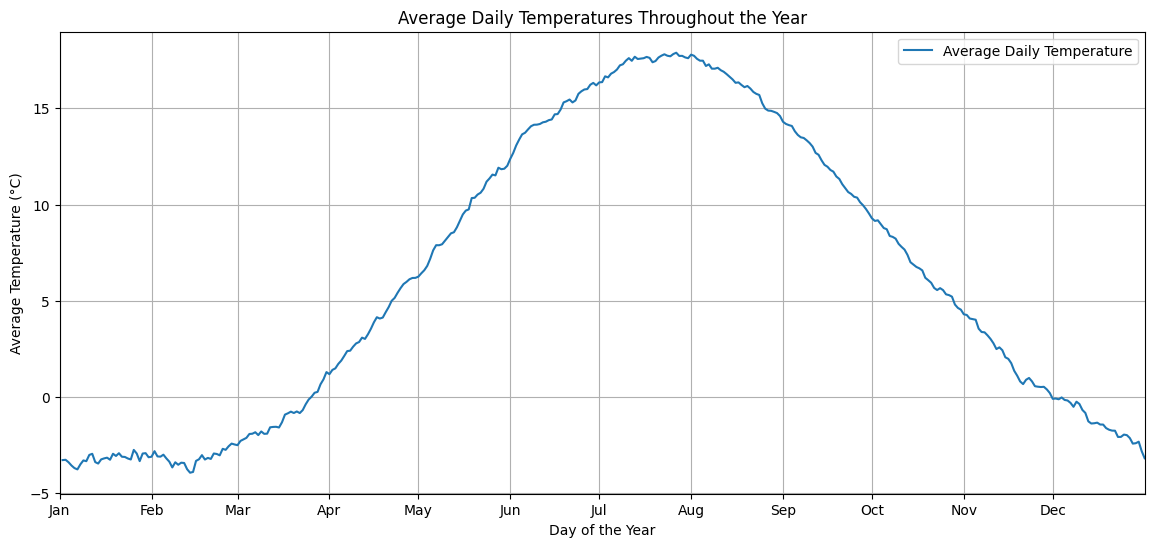

In [5]:
import numpy
import matplotlib.pyplot as pyplot

# Generate x-axis labels
days = numpy.arange(1, len(daily_avg) + 1)  # Number each day for plotting
# Plotting
pyplot.figure(figsize=(14, 6))
pyplot.plot(days, daily_avg, label="Average Daily Temperature", color="tab:blue")
pyplot.xlabel("Day of the Year")
pyplot.ylabel("Average Temperature (°C)")
pyplot.title("Average Daily Temperatures Throughout the Year")
pyplot.legend()



month_ticks = [i for i, date in enumerate(daily_avg.index) if date.endswith('-01')]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pyplot.xticks(month_ticks, month_names)
pyplot.xlim(0, 366)

pyplot.grid()
pyplot.show()

Compare the time series over the first and the last ten years in a seperate diagram.

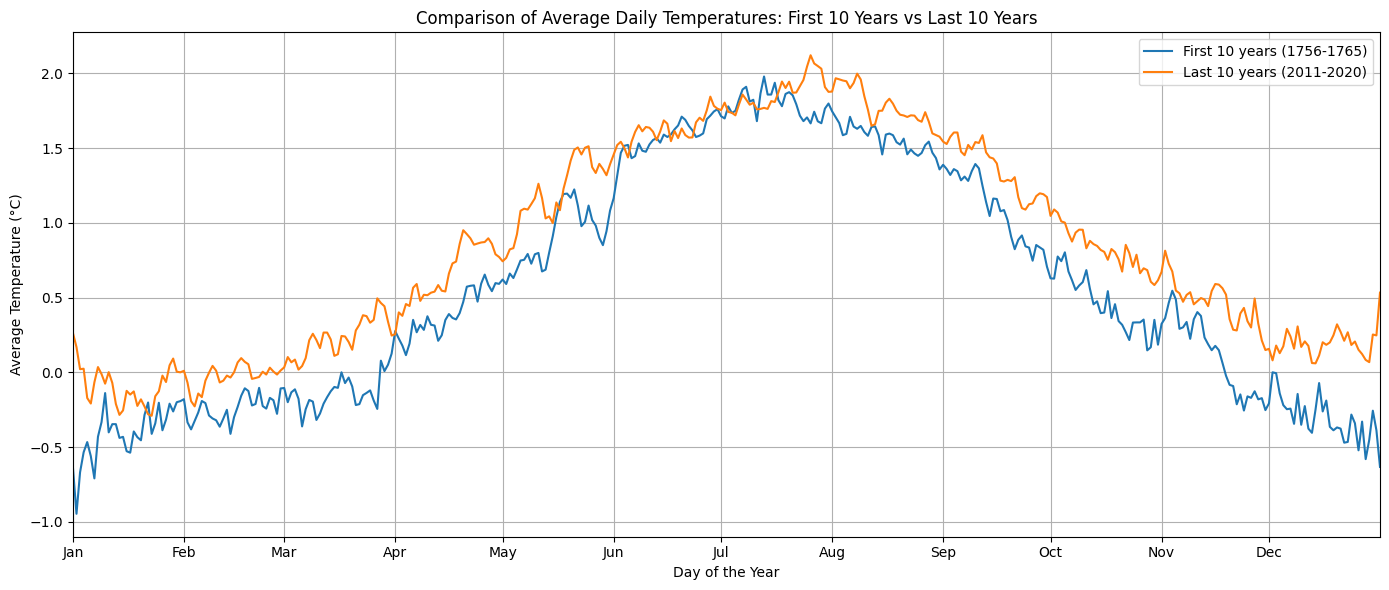

In [6]:
data['year'] = data['DATE'].dt.year
data['day_of_year'] = data['DATE'].dt.dayofyear

# Determine the first and last 10 years in the dataset
first_year = data['year'].min()
last_year = data['year'].max()

# Filter data for the first 10 years and the last 10 years
first_10_years_data = data[(data['year'] >= first_year) & (data['year'] < first_year + 10)]
last_10_years_data = data[(data['year'] > last_year - 10) & (data['year'] <= last_year)]

# Calculate average temperature for each day of the year
first_10_years_avg = first_10_years_data.groupby('day_of_year')['TG'].mean() / 10.0
last_10_years_avg = last_10_years_data.groupby('day_of_year')['TG'].mean() / 10.0

pyplot.figure(figsize=(14, 6))
pyplot.plot(first_10_years_avg.index, first_10_years_avg, label=f"First 10 years ({first_year}-{first_year + 9})", color="tab:blue")
pyplot.plot(last_10_years_avg.index, last_10_years_avg, label=f"Last 10 years ({last_year - 9}-{last_year})", color="tab:orange")

pyplot.xlabel("Day of the Year")
pyplot.ylabel("Average Temperature (°C)")
pyplot.title("Comparison of Average Daily Temperatures: First 10 Years vs Last 10 Years")
pyplot.legend()

# Define month ticks for better readability
month_start_dates = ['01-01', '02-01', '03-01', '04-01', '05-01', '06-01',
                        '07-01', '08-01', '09-01', '10-01', '11-01', '12-01']
month_start_days = [pandas.to_datetime(date, format='%m-%d').dayofyear for date in month_start_dates]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pyplot.xticks(month_start_days, month_names)

# Set x-axis limits to ensure the plot starts on Jan 1 and ends on Dec 31
pyplot.xlim(1, 366)

pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()

## Task 2
Calculate the top 5 largest and lowest values of the temperature. At which days did
these extreme events occur? Calculate mean, variance and standard deviation over the whole
time series. Calculate and plot the mean and the standard deviation of the temperature conditioned on the month of the year (temperature climograph) using either errorbars or boxplots.
Be sure to explain the plot in the captions.

In [7]:
highest_temps = data.nlargest(5, 'TG')[['DATE', 'TG']]
lowest_temps = data.nsmallest(5, 'TG')[['DATE', 'TG']]

print("Dates with the Highest Temperatures:")
print(highest_temps)
print("\nDates with the Lowest Temperatures:")
print(lowest_temps)

Dates with the Highest Temperatures:
            DATE    TG
80206 1975-08-07  28.3
83101 1983-07-11  27.6
87136 1994-07-28  27.2
20271 1811-07-03  27.1
80205 1975-08-06  27.1

Dates with the Lowest Temperatures:
            DATE    TG
1467  1760-01-07 -27.7
21203 1814-01-20 -25.8
15750 1799-02-14 -25.7
21202 1814-01-19 -25.2
10650 1785-02-27 -25.1


mean, variance, standard deviation

In [8]:
mean_temp = data['TG'].mean()
variance_temp = data['TG'].var() # R^2
standard_deviation_temp = data['TG'].std() # R

print(f"Mean Temperature: {mean_temp:.2f}°C")
print(f"Variance of Temperature: {variance_temp:.2f}")
print(f"Standard Deviation of Temperature: {standard_deviation_temp:.2f}")

Mean Temperature: 6.21°C
Variance of Temperature: 70.20
Standard Deviation of Temperature: 8.38


Boxplot of monthy average temperatures

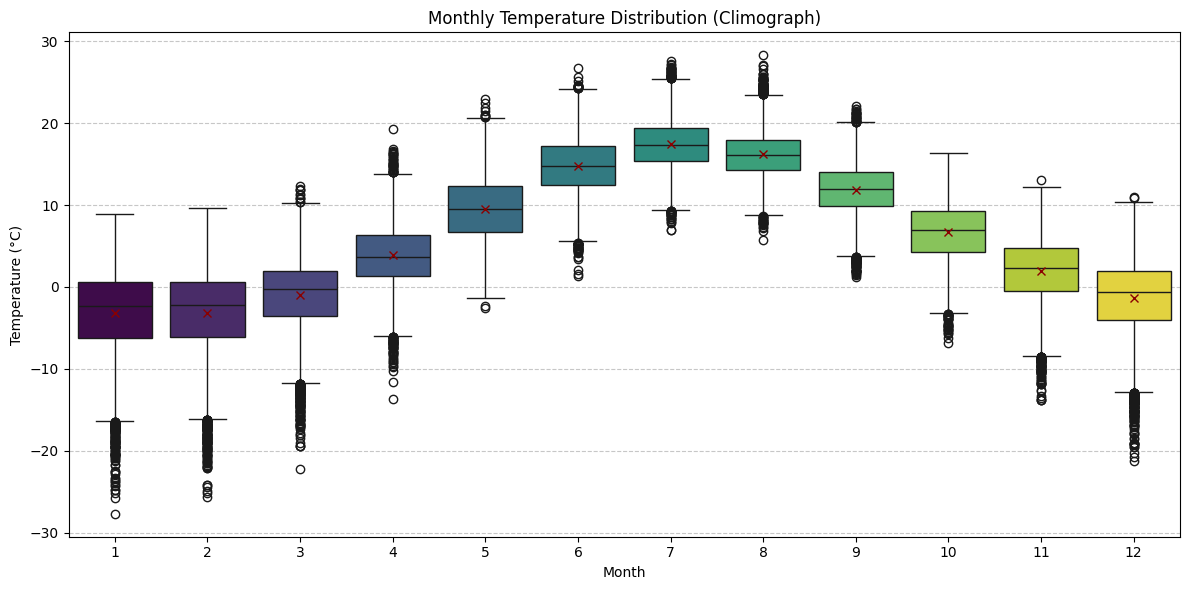

            mean       std
Month                     
1      -3.207462  5.103416
2      -3.157622  5.154930
3      -0.935679  4.477665
4       3.924126  3.768879
5       9.580329  4.029489
6      14.807610  3.497244
7      17.445100  3.020216
8      16.216239  2.846824
9      11.891836  3.092688
10      6.747523  3.535732
11      1.943421  3.919121
12     -1.350310  4.566664


In [13]:
import seaborn

data['Month'] = data['DATE'].dt.month

pyplot.figure(figsize=(12, 6))

seaborn.boxplot(x='Month', y='TG', data=data, hue='Month', legend=False, palette='viridis', showmeans=True, meanprops={'marker':'x','markeredgecolor':'darkred'})

pyplot.xlabel("Month")
pyplot.ylabel("Temperature (°C)")
pyplot.title("Monthly Temperature Distribution (Climograph)")

pyplot.grid(True, axis='y', linestyle='--', alpha=0.7)
pyplot.tight_layout()
pyplot.show()

monthly_stats = data.groupby('Month')['TG'].agg(['mean', 'std'])
print(monthly_stats)

The temperature climograph shows monthly distributions of daily temperatures. The boxes represent interquartile ranges, with the horizontal line inside each box marking the median temperature for that month. The whiskers extend to 1.5 times the interquartile range, and dots represent outliers. 

## Task 3

Calculate and draw the M = 1, M = 10 and M = 20 years moving averages at. For
values at at the beginning and at the end of the time series the sliding window stretches into
time intervals for which there is no data. Make a reasonable assumption and correction for
these boundary effects and note these assuptions in the report.

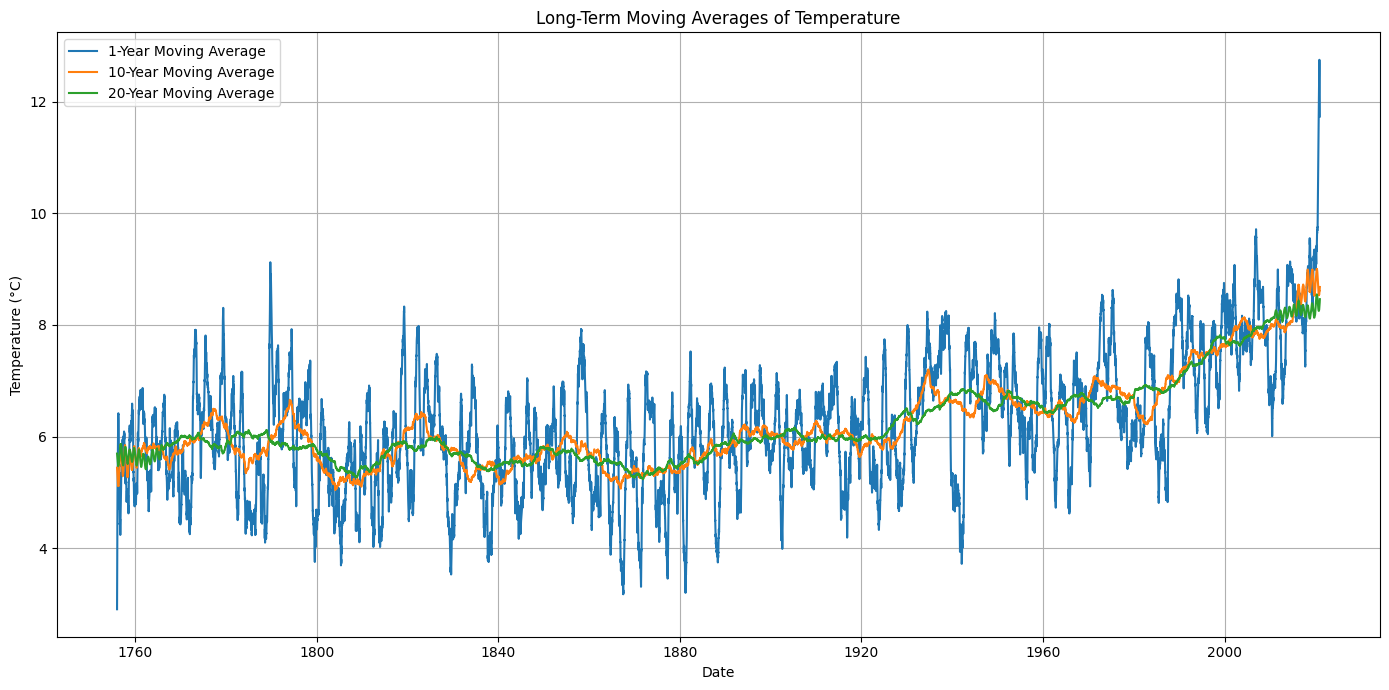

In [9]:
def moving_average(data, M):
    T = 365.25
    window_days = int(M * T)
    moving_avg = data['TG'].rolling(window=window_days, min_periods=1, center=True).mean()

    return moving_avg

pyplot.figure(figsize=(14, 7))
# pyplot.plot(data['DATE'], data['TG'], color="gray", alpha=0.4, label="Daily Temperature")

for M in [1, 10, 20]:
    moving_avg = moving_average(data, M)
    pyplot.plot(data['DATE'], moving_avg, label=f"{M}-Year Moving Average")

pyplot.xlabel("Date")
pyplot.ylabel("Temperature (°C)")
pyplot.title("Long-Term Moving Averages of Temperature")
pyplot.legend()
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()



What kind of correction or assumption am I supposed to do?
I can add `min_periods=1` to the `rolling`function to ensure that data is available at the edge of the time series.

Task 4: Calculate Sk and Ck for k = 1 . . . 3 from yt, from that pt with Eq.1, and finally the fluctuations nt = yt − pt. Plot pt on top of yt and plot nt separately.

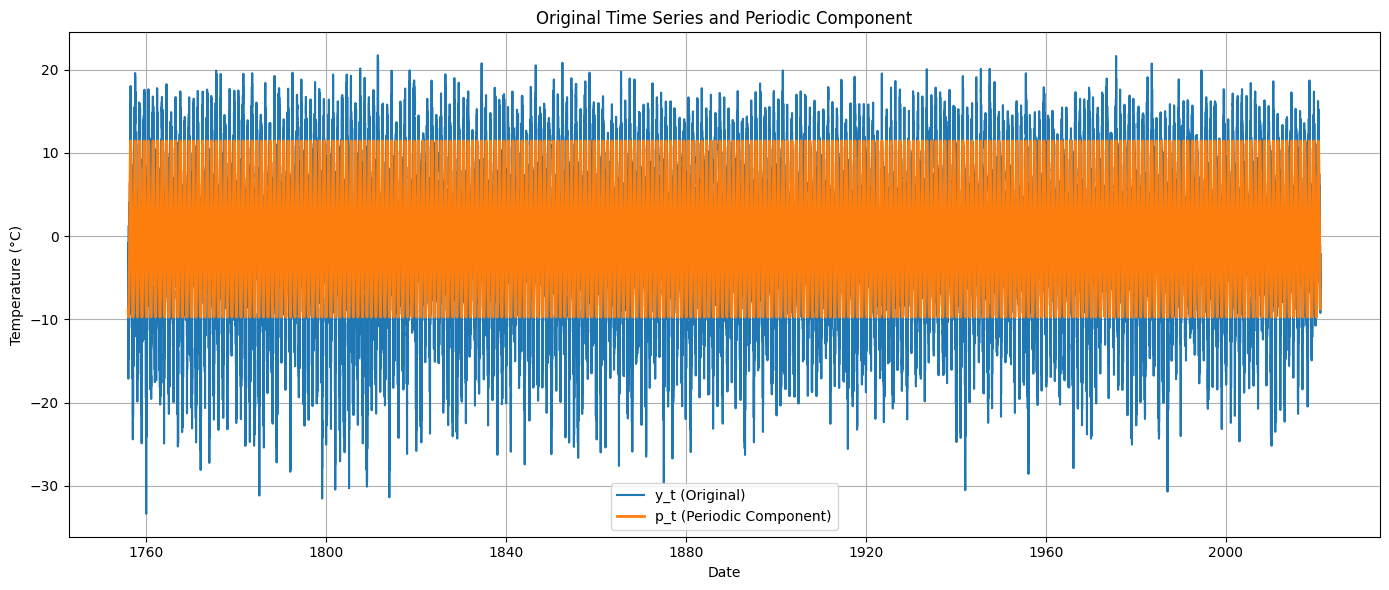

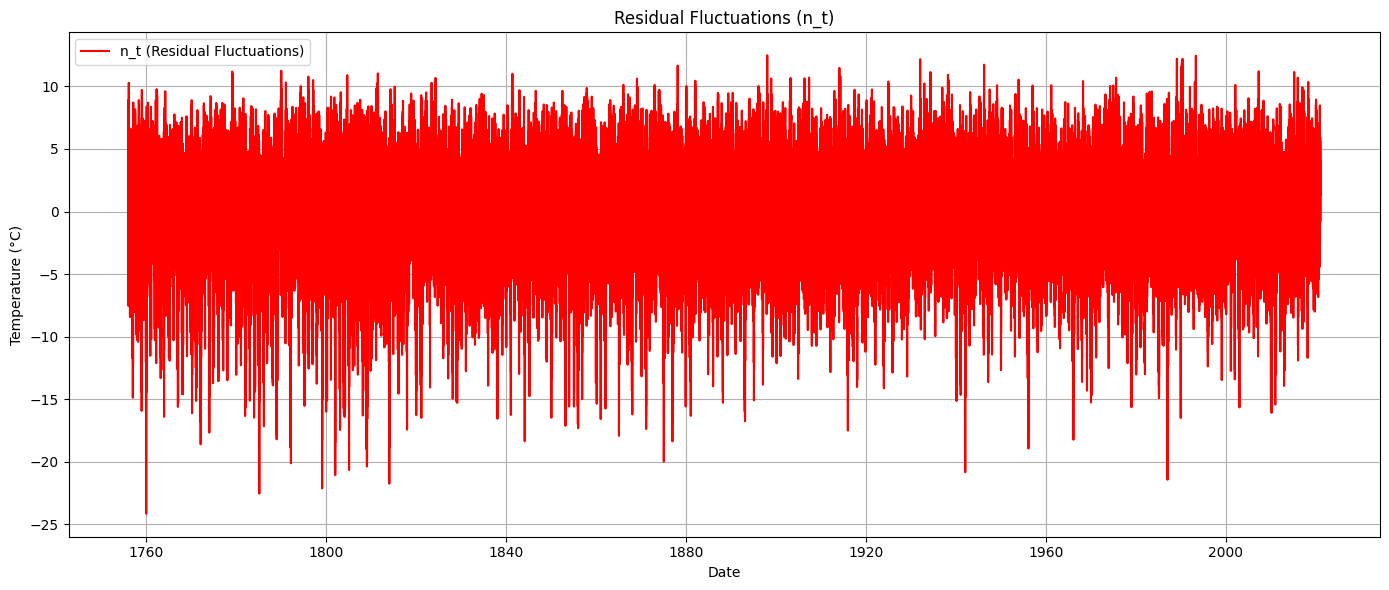

In [10]:
def compute_fourier_coefficients(y_t, T, N, k_max=3):
    """
    Compute Fourier coefficients S_k and C_k for k=1 to k_max.
    """
    S_k = []
    C_k = []

    for k in range(1, k_max + 1):
        # Compute Sk and Ck
        omega = 2 * numpy.pi * k / T  # Frequency
        S_k_val = (2 / N) * numpy.sum(y_t * numpy.sin(omega * numpy.arange(N)))
        C_k_val = (2 / N) * numpy.sum(y_t * numpy.cos(omega * numpy.arange(N)))

        S_k.append(S_k_val)
        C_k.append(C_k_val)

    return numpy.array(S_k), numpy.array(C_k)

def reconstruct_periodic_component(S_k, C_k, T, N):
    """
    Reconstruct p_t from Fourier coefficients S_k and C_k.
    """
    t = numpy.arange(N)
    p_t = numpy.zeros(N)

    for k, (Sk, Ck) in enumerate(zip(S_k, C_k), start=1):
        omega = 2 * numpy.pi * k / T  # Frequency
        p_t += Sk * numpy.sin(omega * t) + Ck * numpy.cos(omega * t)

    return p_t

M_years = 20 
T=365.25
k_max=3
# Remove long-term trend (moving average)
a_t = moving_average(data, M_years)
y_t = data['TG'] - a_t

# Average over an integer multiple of T
N = len(y_t)  # Ensure it's an integer multiple of T
y_t = y_t[:N]

# Compute Fourier coefficients
S_k, C_k = compute_fourier_coefficients(y_t, T, N, k_max)

# Reconstruct periodic component
p_t = reconstruct_periodic_component(S_k, C_k, T, N)

# Compute residual fluctuations
n_t = y_t - p_t

# Plotting
pyplot.figure(figsize=(14, 6))

# Plot yt and pt
pyplot.plot(data['DATE'][:N], y_t, label="y_t (Original)")
pyplot.plot(data['DATE'][:N], p_t, label="p_t (Periodic Component)", linewidth=2)
pyplot.title("Original Time Series and Periodic Component")
pyplot.xlabel("Date")
pyplot.ylabel("Temperature (°C)")
pyplot.legend()
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()

# Plot nt
pyplot.figure(figsize=(14, 6))
pyplot.plot(data['DATE'][:N], n_t, label="n_t (Residual Fluctuations)", color="red")
pyplot.title("Residual Fluctuations (n_t)")
pyplot.xlabel("Date")
pyplot.ylabel("Temperature (°C)")
pyplot.legend()
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()



Task 5: At which dates assumes nt a maximum and a minimum, i.e. which where the seasonally
most unusual temperature deviations? Report absolute temperature xt and deviation nt from
seasonal norm on these dates. Calculate the empirical mean μ and the variance σ2 of the
fluctuations nt. Plot a normalized histogram of the temperature fluctuations nt and a Gaussian
distribution (Eq.2) of the same mean and variance on top. Draw the plot again in semilogy
scale to observe the difference in the probabilities to the Gaussian prediction in the bulk and
in the tails.

Maximum fluctuation on 1898-01-19 00:00:00: n_t = 12.49, x_t = 8.80
Minimum fluctuation on 1760-01-07 00:00:00: n_t = -24.16, x_t = -27.70
Empirical mean (μ): 0.00
Empirical variance (σ^2): 14.03


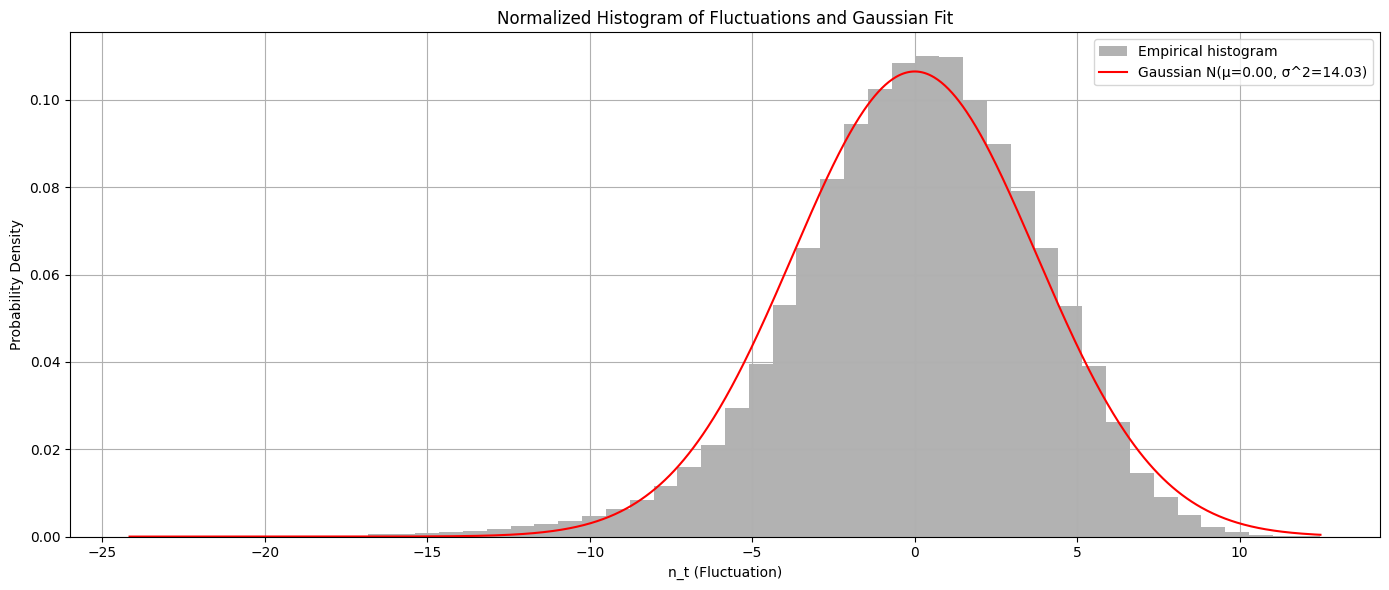

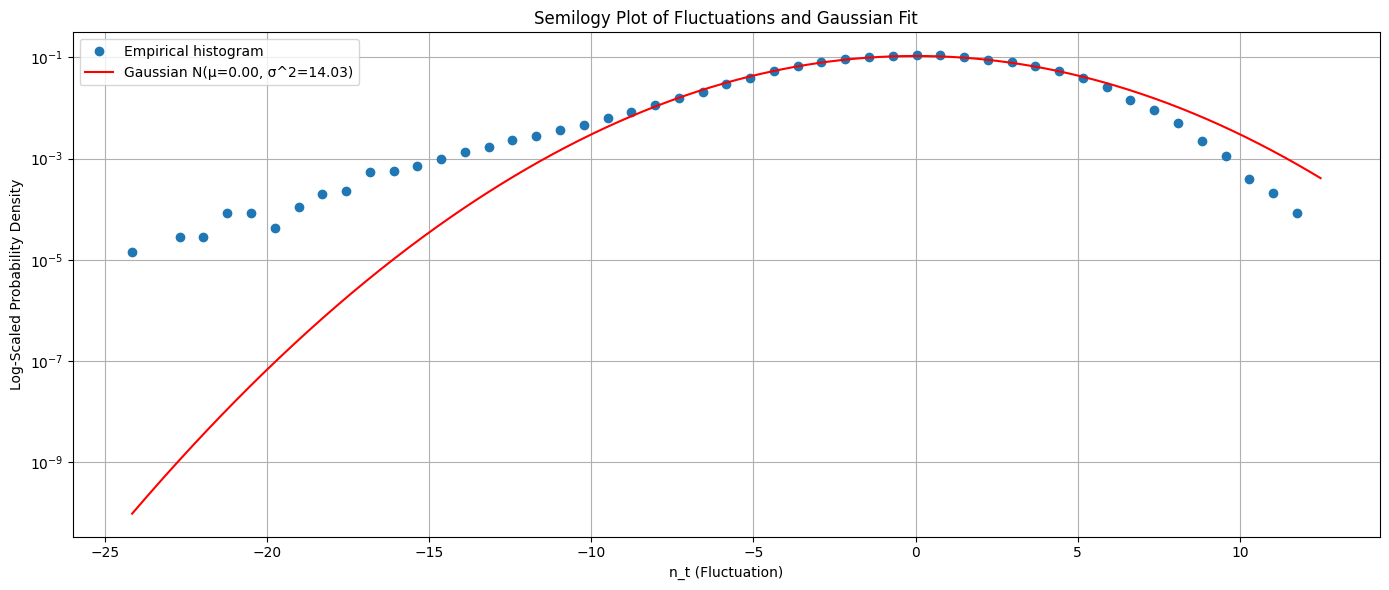

In [11]:
from scipy.stats import norm

xt = data['TG']
dates = data['DATE']

# Find maximum and minimum fluctuations
max_idx = numpy.argmax(n_t)
min_idx = numpy.argmin(n_t)
max_date, max_nt, max_xt = dates[max_idx], n_t[max_idx], xt[max_idx]
min_date, min_nt, min_xt = dates[min_idx], n_t[min_idx], xt[min_idx]

print(f"Maximum fluctuation on {max_date}: n_t = {max_nt:.2f}, x_t = {max_xt:.2f}")
print(f"Minimum fluctuation on {min_date}: n_t = {min_nt:.2f}, x_t = {min_xt:.2f}")

# Empirical mean and variance
mu = numpy.mean(n_t)
sigma2 = numpy.var(n_t)
sigma = numpy.sqrt(sigma2)

print(f"Empirical mean (μ): {mu:.2f}")
print(f"Empirical variance (σ^2): {sigma2:.2f}")

# Plot histogram and Gaussian
pyplot.figure(figsize=(14, 6))

# Normalized histogram
bins = 50
counts, bin_edges, _ = pyplot.hist(n_t, bins=bins, density=True, alpha=0.6, color='gray', label="Empirical histogram")

# Gaussian distribution
x_vals = numpy.linspace(min(bin_edges), max(bin_edges), 1000)
gaussian = norm.pdf(x_vals, mu, sigma)
pyplot.plot(x_vals, gaussian, color='red', label=f"Gaussian N(μ={mu:.2f}, σ^2={sigma2:.2f})")

# Labels and legend
pyplot.title("Normalized Histogram of Fluctuations and Gaussian Fit")
pyplot.xlabel("n_t (Fluctuation)")
pyplot.ylabel("Probability Density")
pyplot.legend()
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()

# Semilogy plot
pyplot.figure(figsize=(14, 6))
pyplot.semilogy(bin_edges[:-1], counts, 'o', label="Empirical histogram")
pyplot.semilogy(x_vals, gaussian, color='red', label=f"Gaussian N(μ={mu:.2f}, σ^2={sigma2:.2f})")

# Labels and legend
pyplot.title("Semilogy Plot of Fluctuations and Gaussian Fit")
pyplot.xlabel("n_t (Fluctuation)")
pyplot.ylabel("Log-Scaled Probability Density")
pyplot.legend()
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()
